# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100

#Set style for matplotlib
plt.style.use('seaborn-deep')

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Feature Selection

**Correlation Matrix**

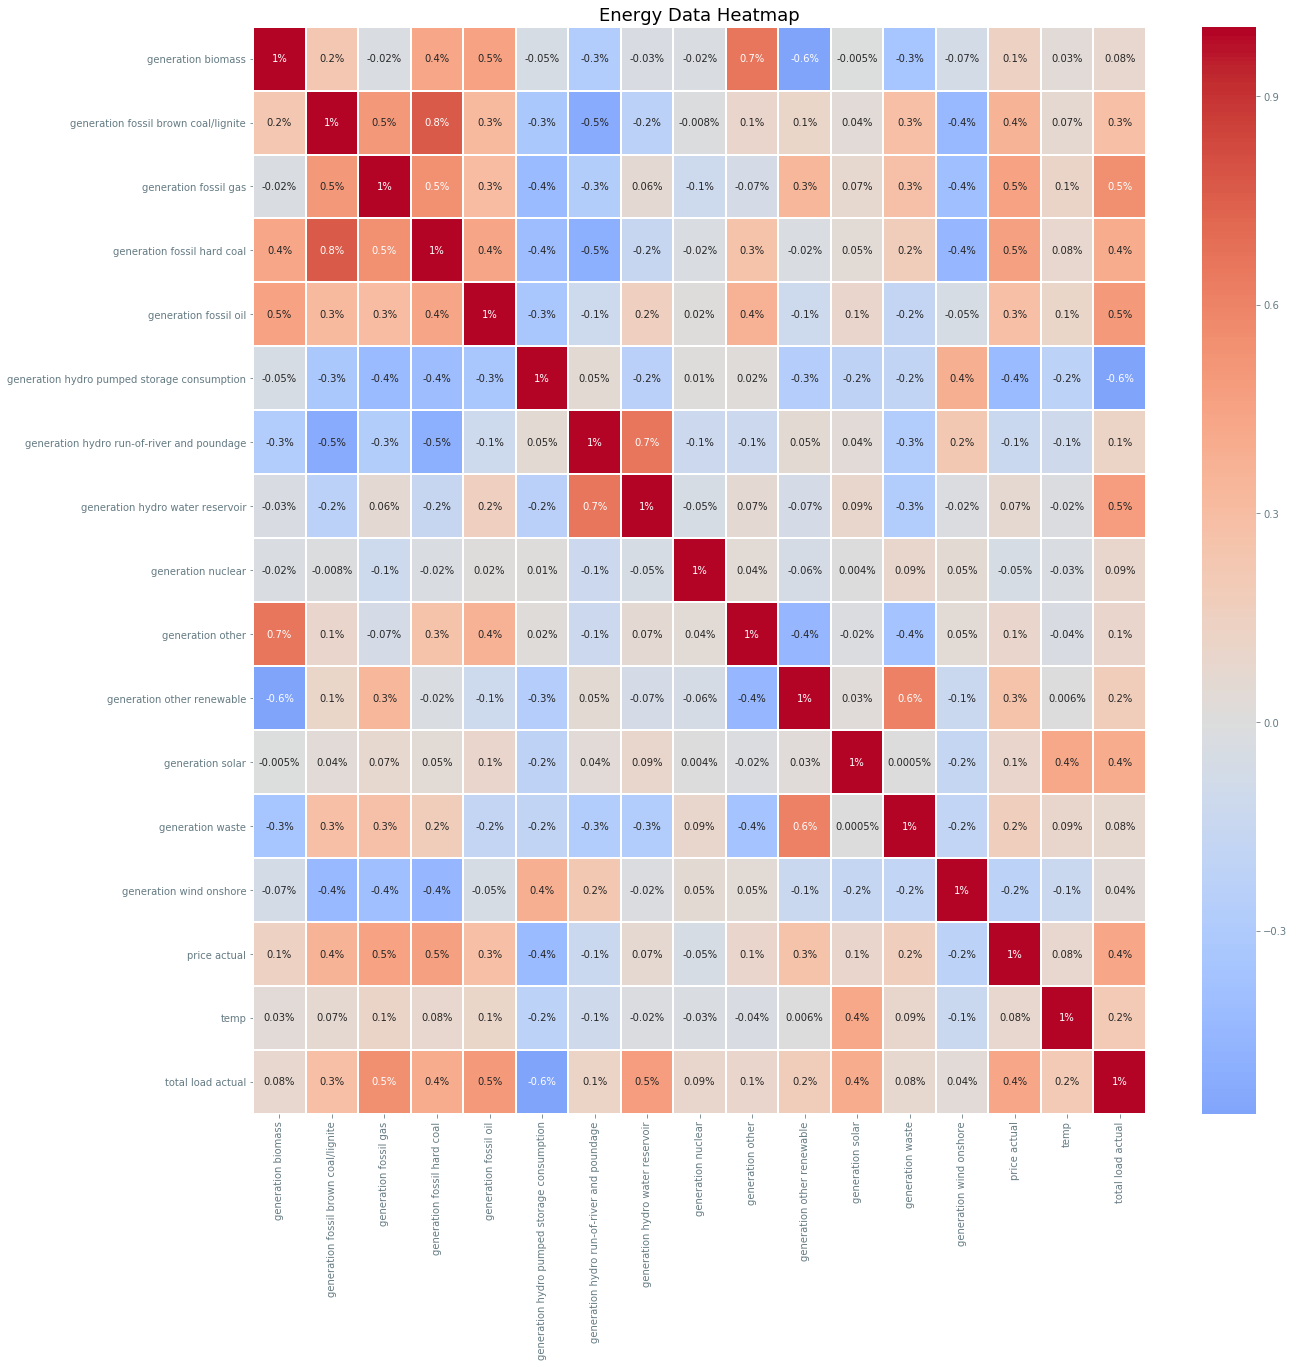

In [5]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300) 

In [6]:
#Create correlation
corr = df.corr()

#Subset feature w/ correlations > .4 or < -.4 with price_actual
correlated_features = corr.loc[(corr['price actual'] > .4)|(corr['price actual'] < -.4)].index.tolist()

#Print
print('Features most correlated w/ target:\n{}'.format(correlated_features))

#Drop features w/ weak/no correlation to target
df = df[correlated_features]

#Check
display(df.head())

Features most correlated w/ target:
['generation fossil gas', 'generation fossil hard coal', 'generation hydro pumped storage consumption', 'price actual', 'total load actual']


,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Make Features Stationary

**Timeplots**

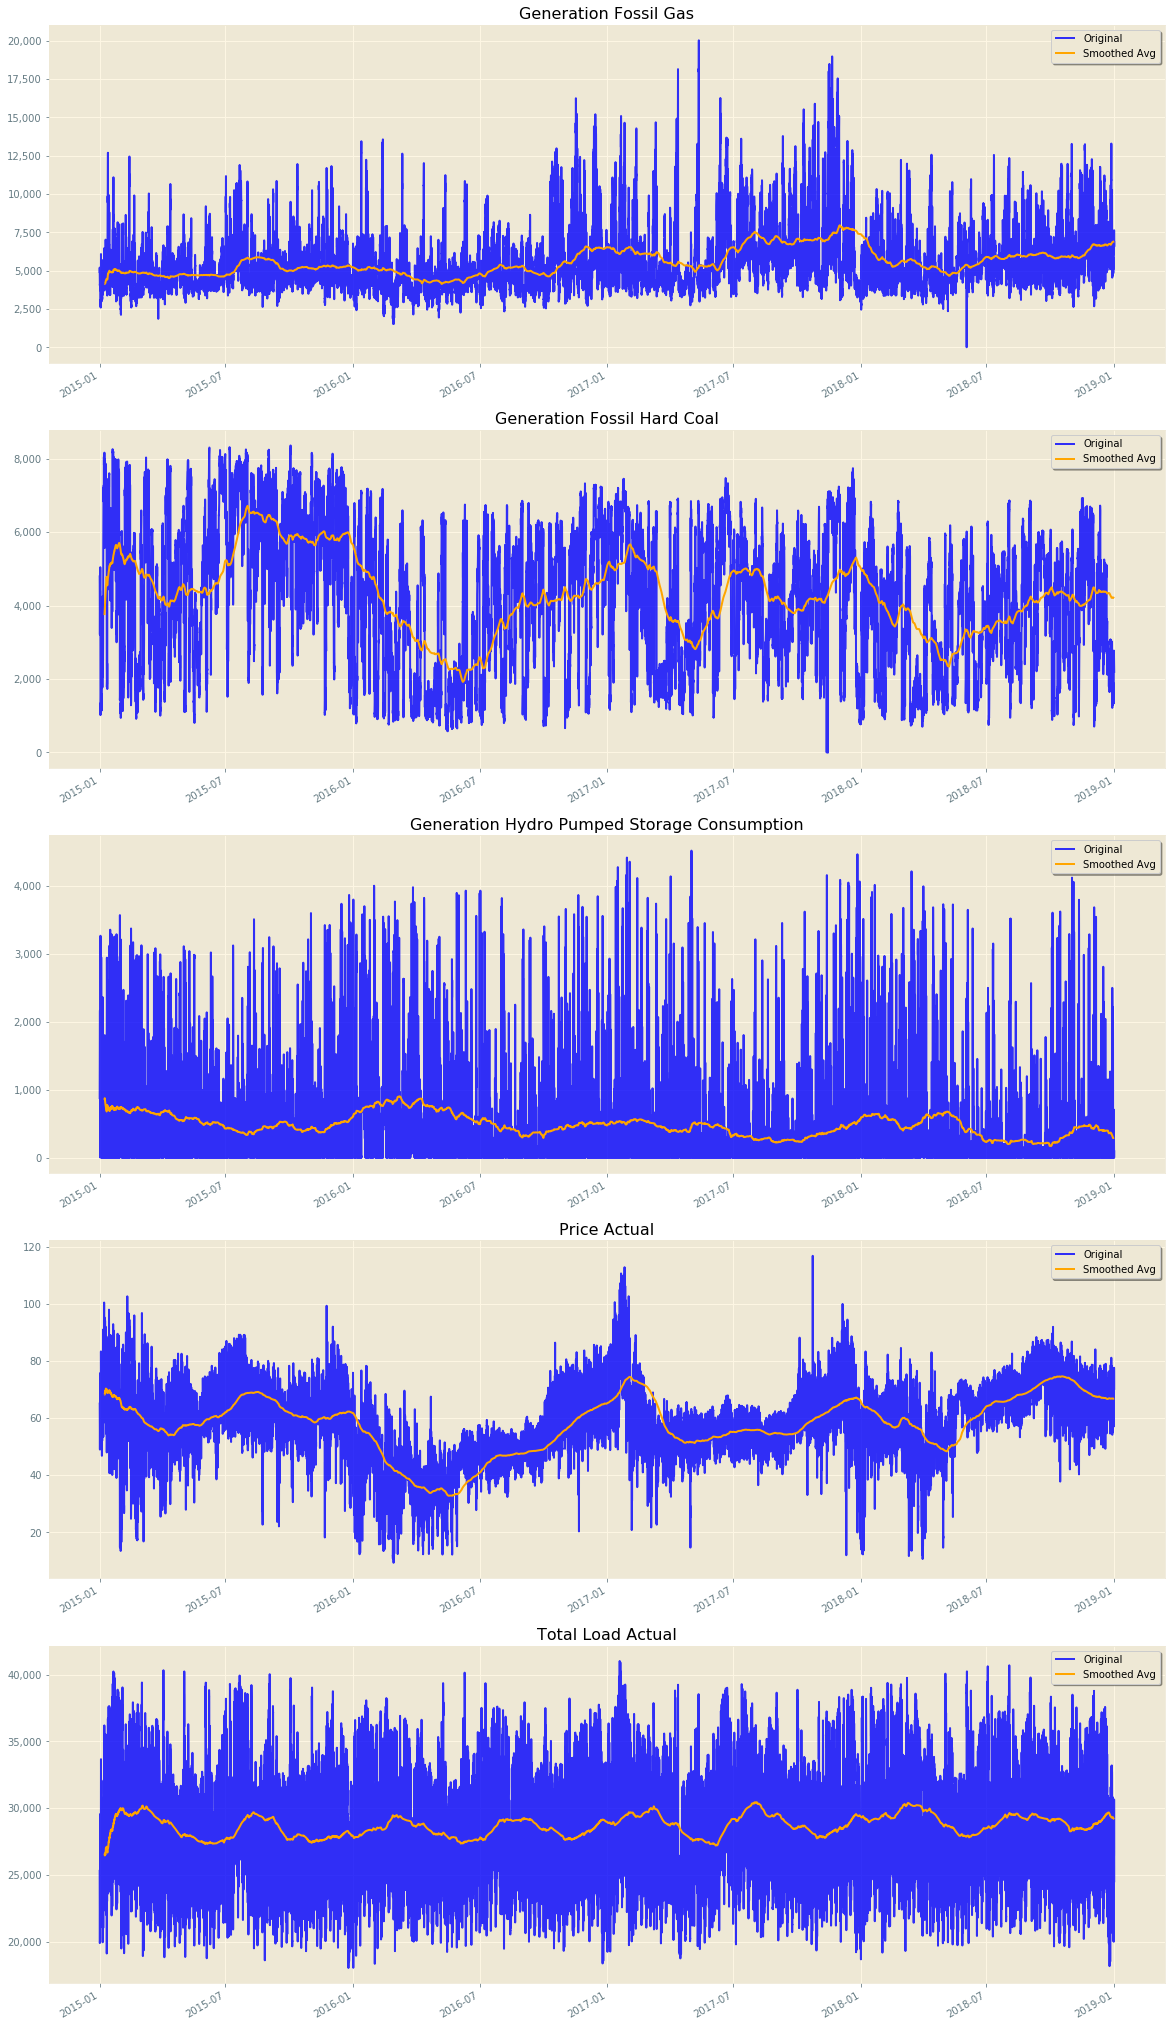

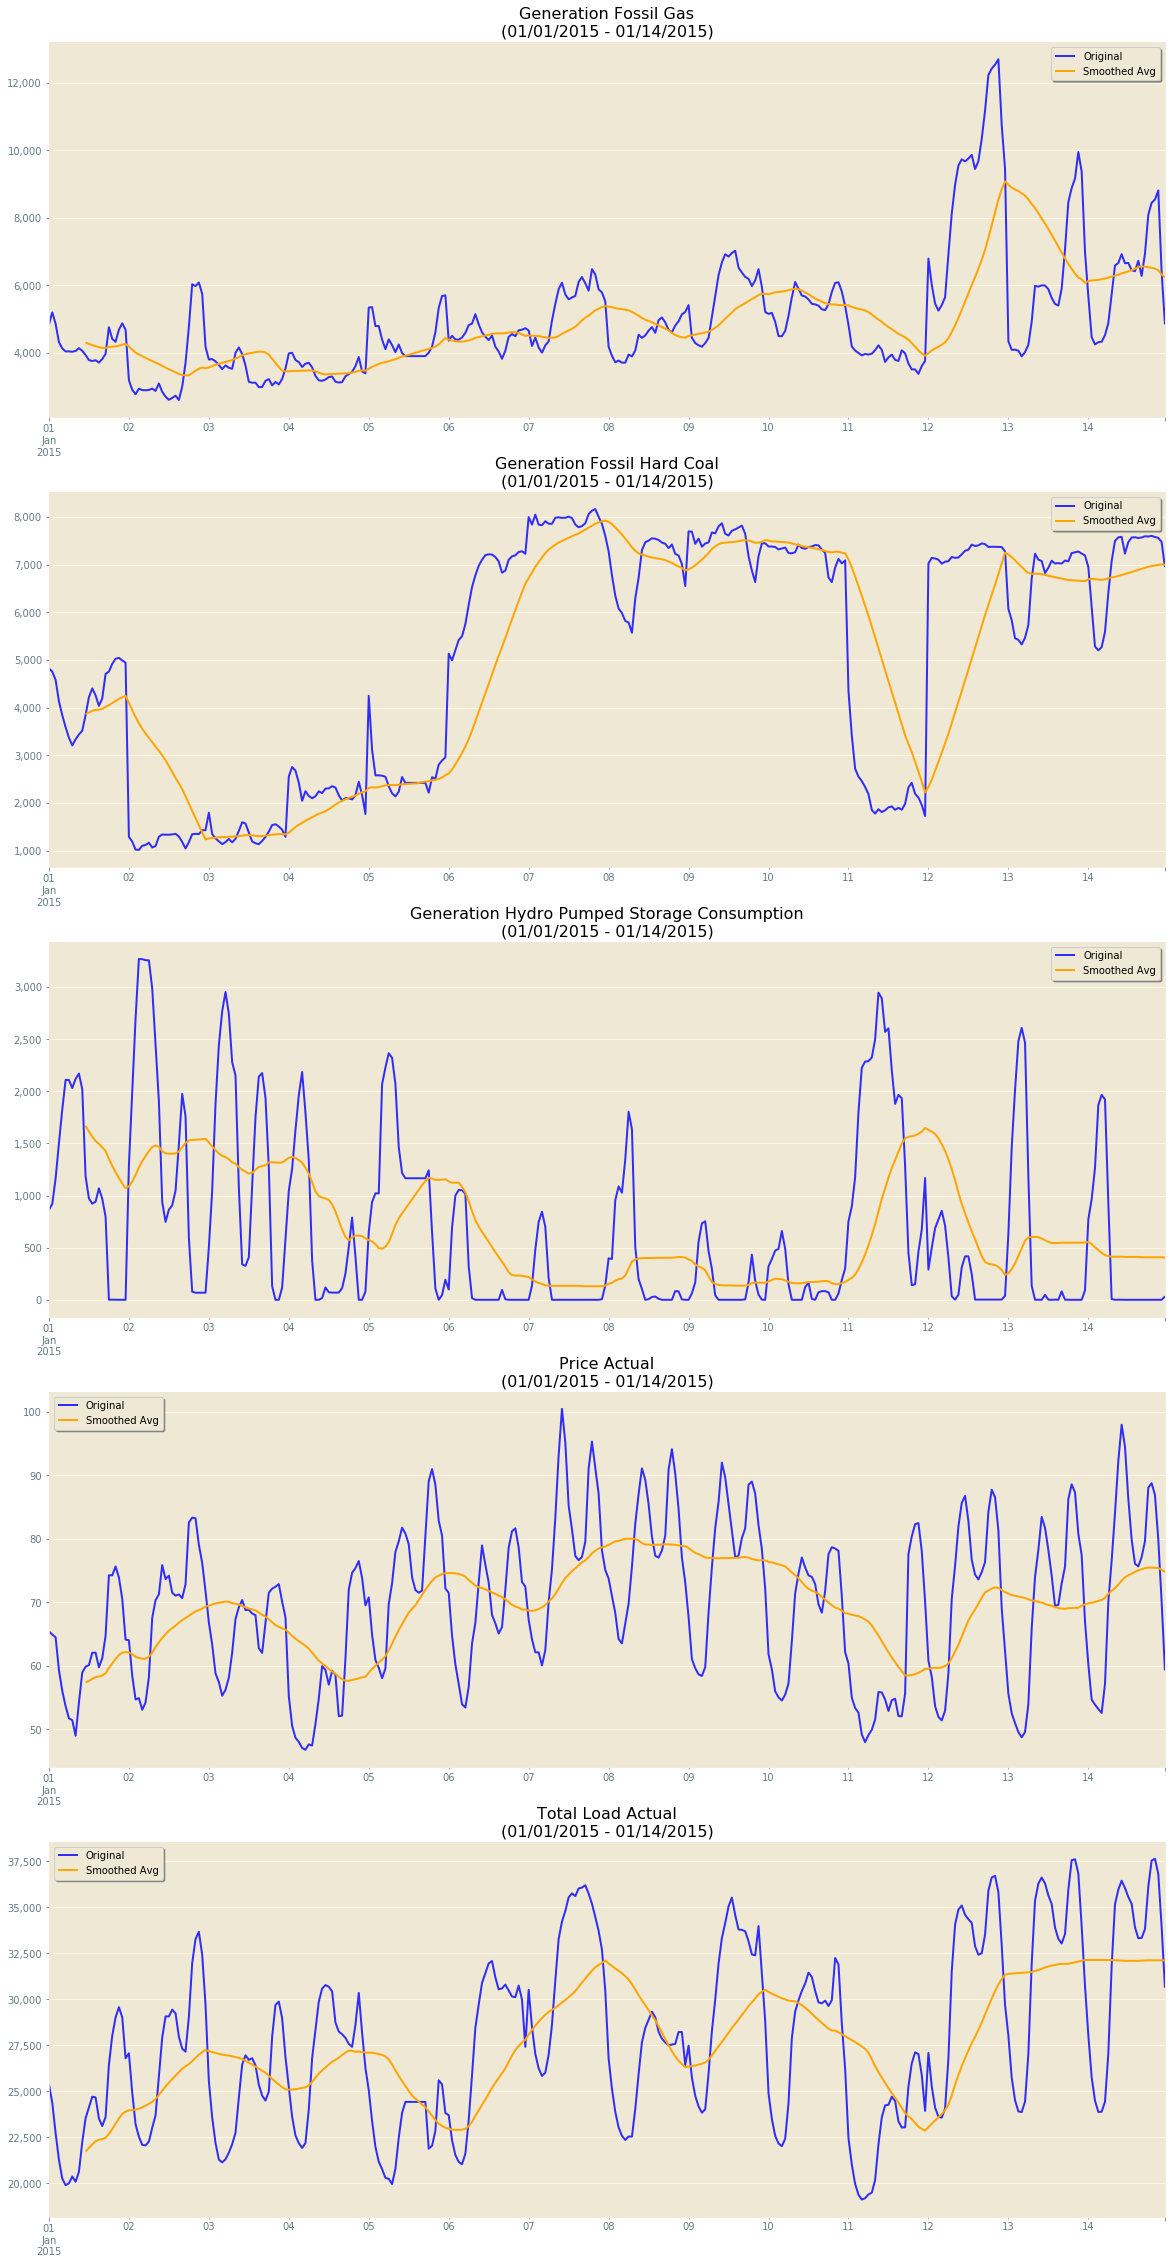

In [7]:
images = ['/Timeplots_Correlated_Features.png',
         '/Zoomed_Timeplots.png']

for image in images:
    display(Image(filename= eda_path + image, height=1300, width=1300) )

**Apply First Order Differencing to each column**

In [8]:
#Write loop that applies differencing to each column and assigns to new column in df
for col in df.columns:
    df[col+' First Order Differenced'] = df[col].diff()
    
#Sort dataframe alphabetically. Should keep differenced col with original col for plotting
df = df.reindex(sorted(df.columns), axis=1)

#Drop na
df.dropna(inplace = True)

#Check
display(df.head())

,generation fossil gas,generation fossil gas First Order Differenced,generation fossil hard coal,generation fossil hard coal First Order Differenced,generation hydro pumped storage consumption,generation hydro pumped storage consumption First Order Differenced,price actual,price actual First Order Differenced,total load actual,total load actual First Order Differenced
date_time,,,,,,,,,,
2015-01-01 01:00:00,5196.0,352.0,4755.0,-66.0,920.0,57.0,64.92,-0.49,24382.0,-1003.0
2015-01-01 02:00:00,4857.0,-339.0,4581.0,-174.0,1164.0,244.0,64.48,-0.44,22734.0,-1648.0
2015-01-01 03:00:00,4314.0,-543.0,4131.0,-450.0,1503.0,339.0,59.32,-5.16,21286.0,-1448.0
2015-01-01 04:00:00,4130.0,-184.0,3840.0,-291.0,1826.0,323.0,56.04,-3.28,20264.0,-1022.0
2015-01-01 05:00:00,4038.0,-92.0,3590.0,-250.0,2109.0,283.0,53.63,-2.41,19905.0,-359.0


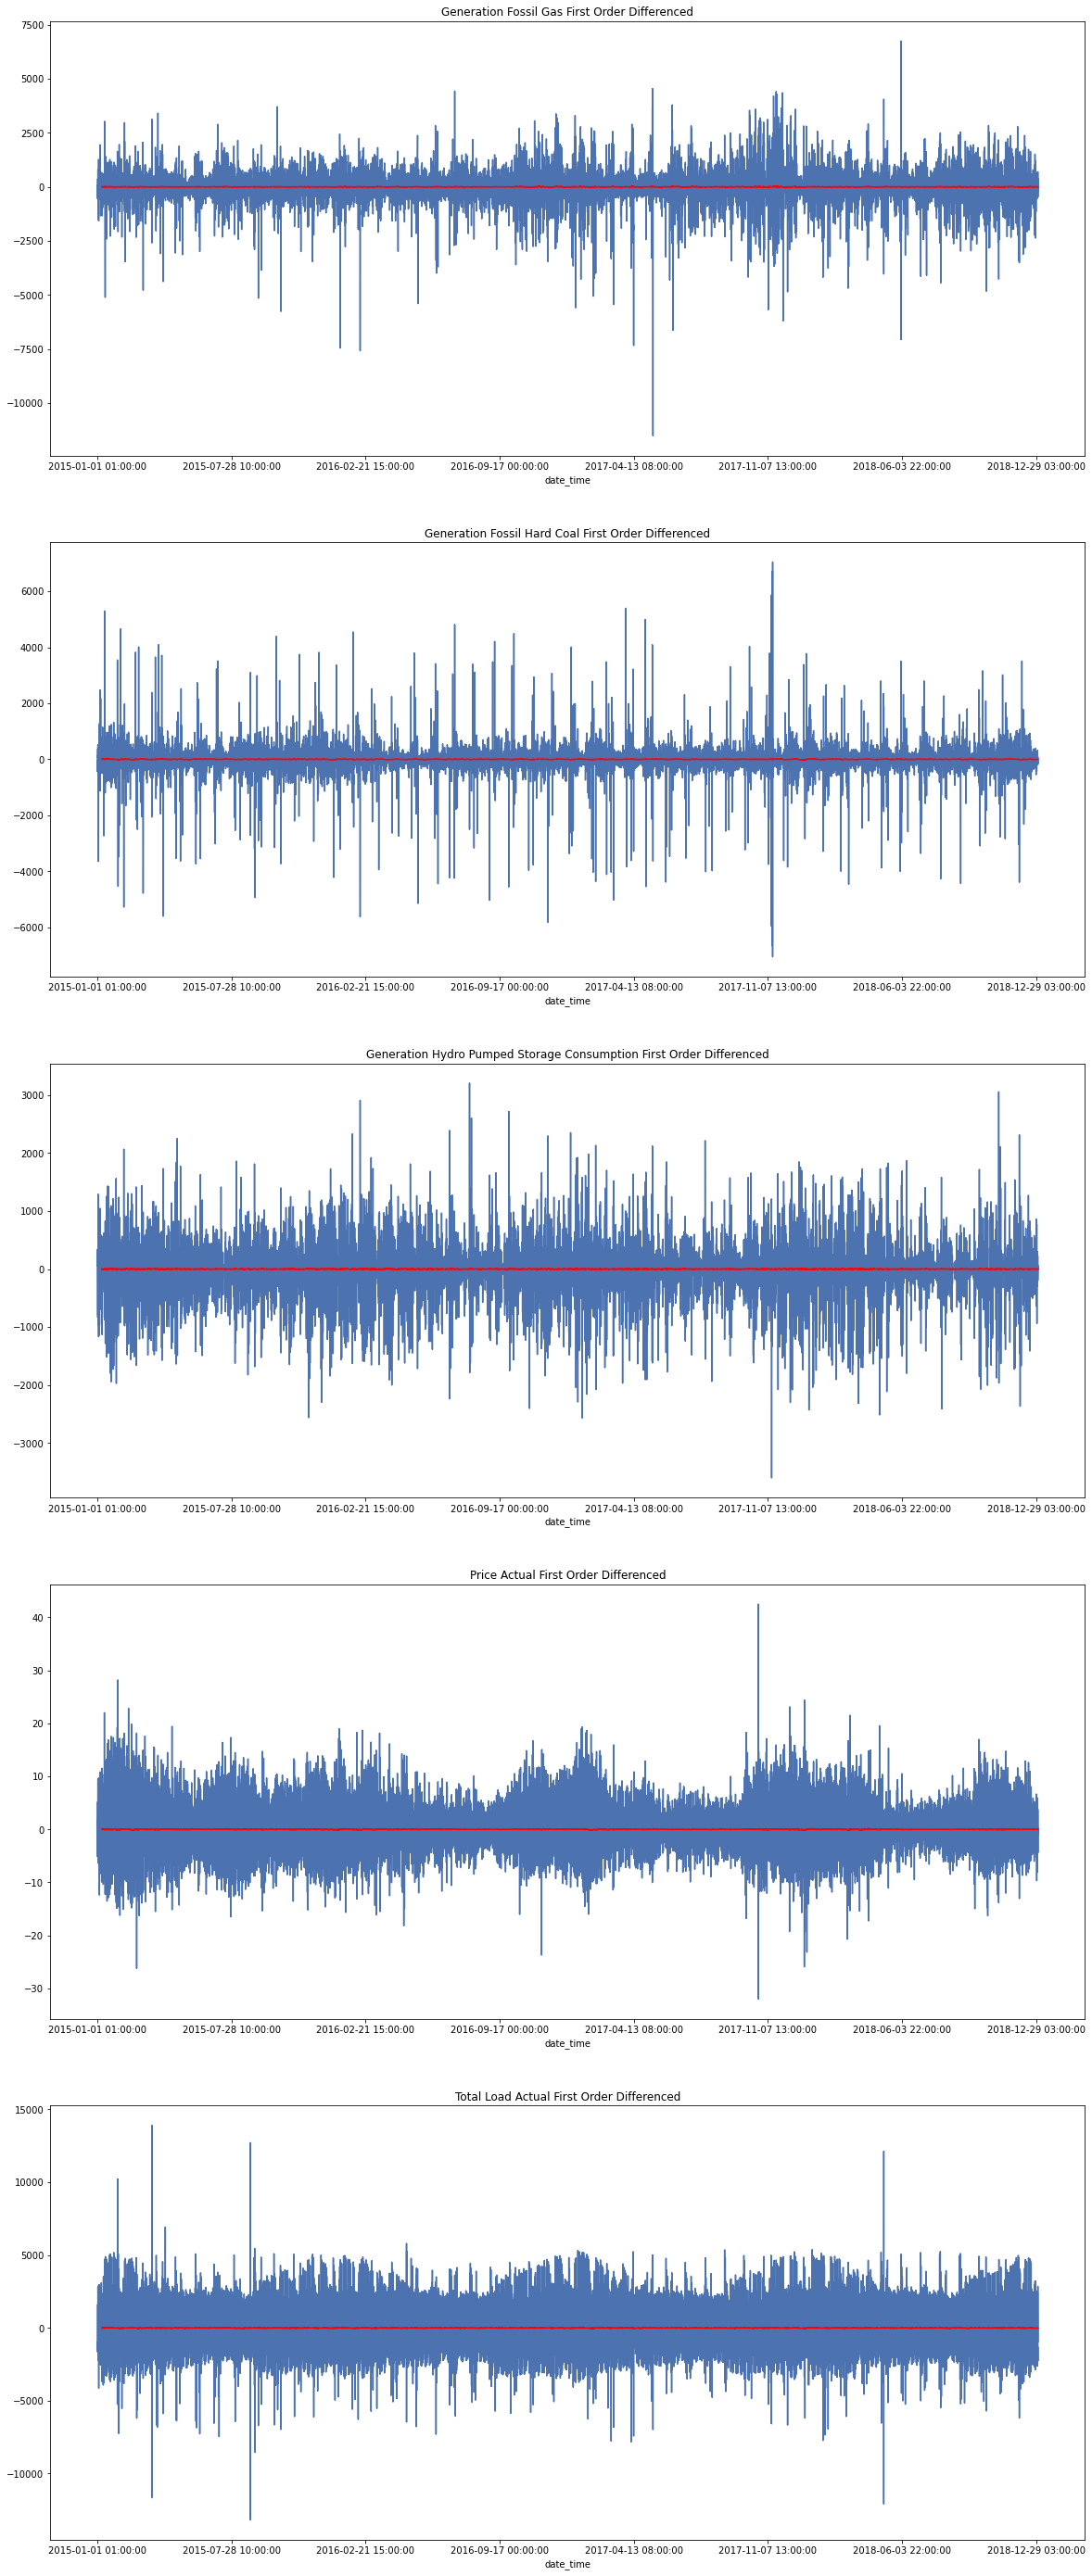

In [35]:
first_order_df = df.filter(regex='First')

f, axes = plt.subplots(5,1,figsize=(20,50))

for col,ax in zip(first_order_df.columns, axes.flat):
    first_order_df[col].plot(ax=ax, title = str.title(col), label = 'Differenced Data')
    first_order_df[col].rolling(min_periods= 24*7, window = 24*14).mean().plot(ax=ax, color ='red')

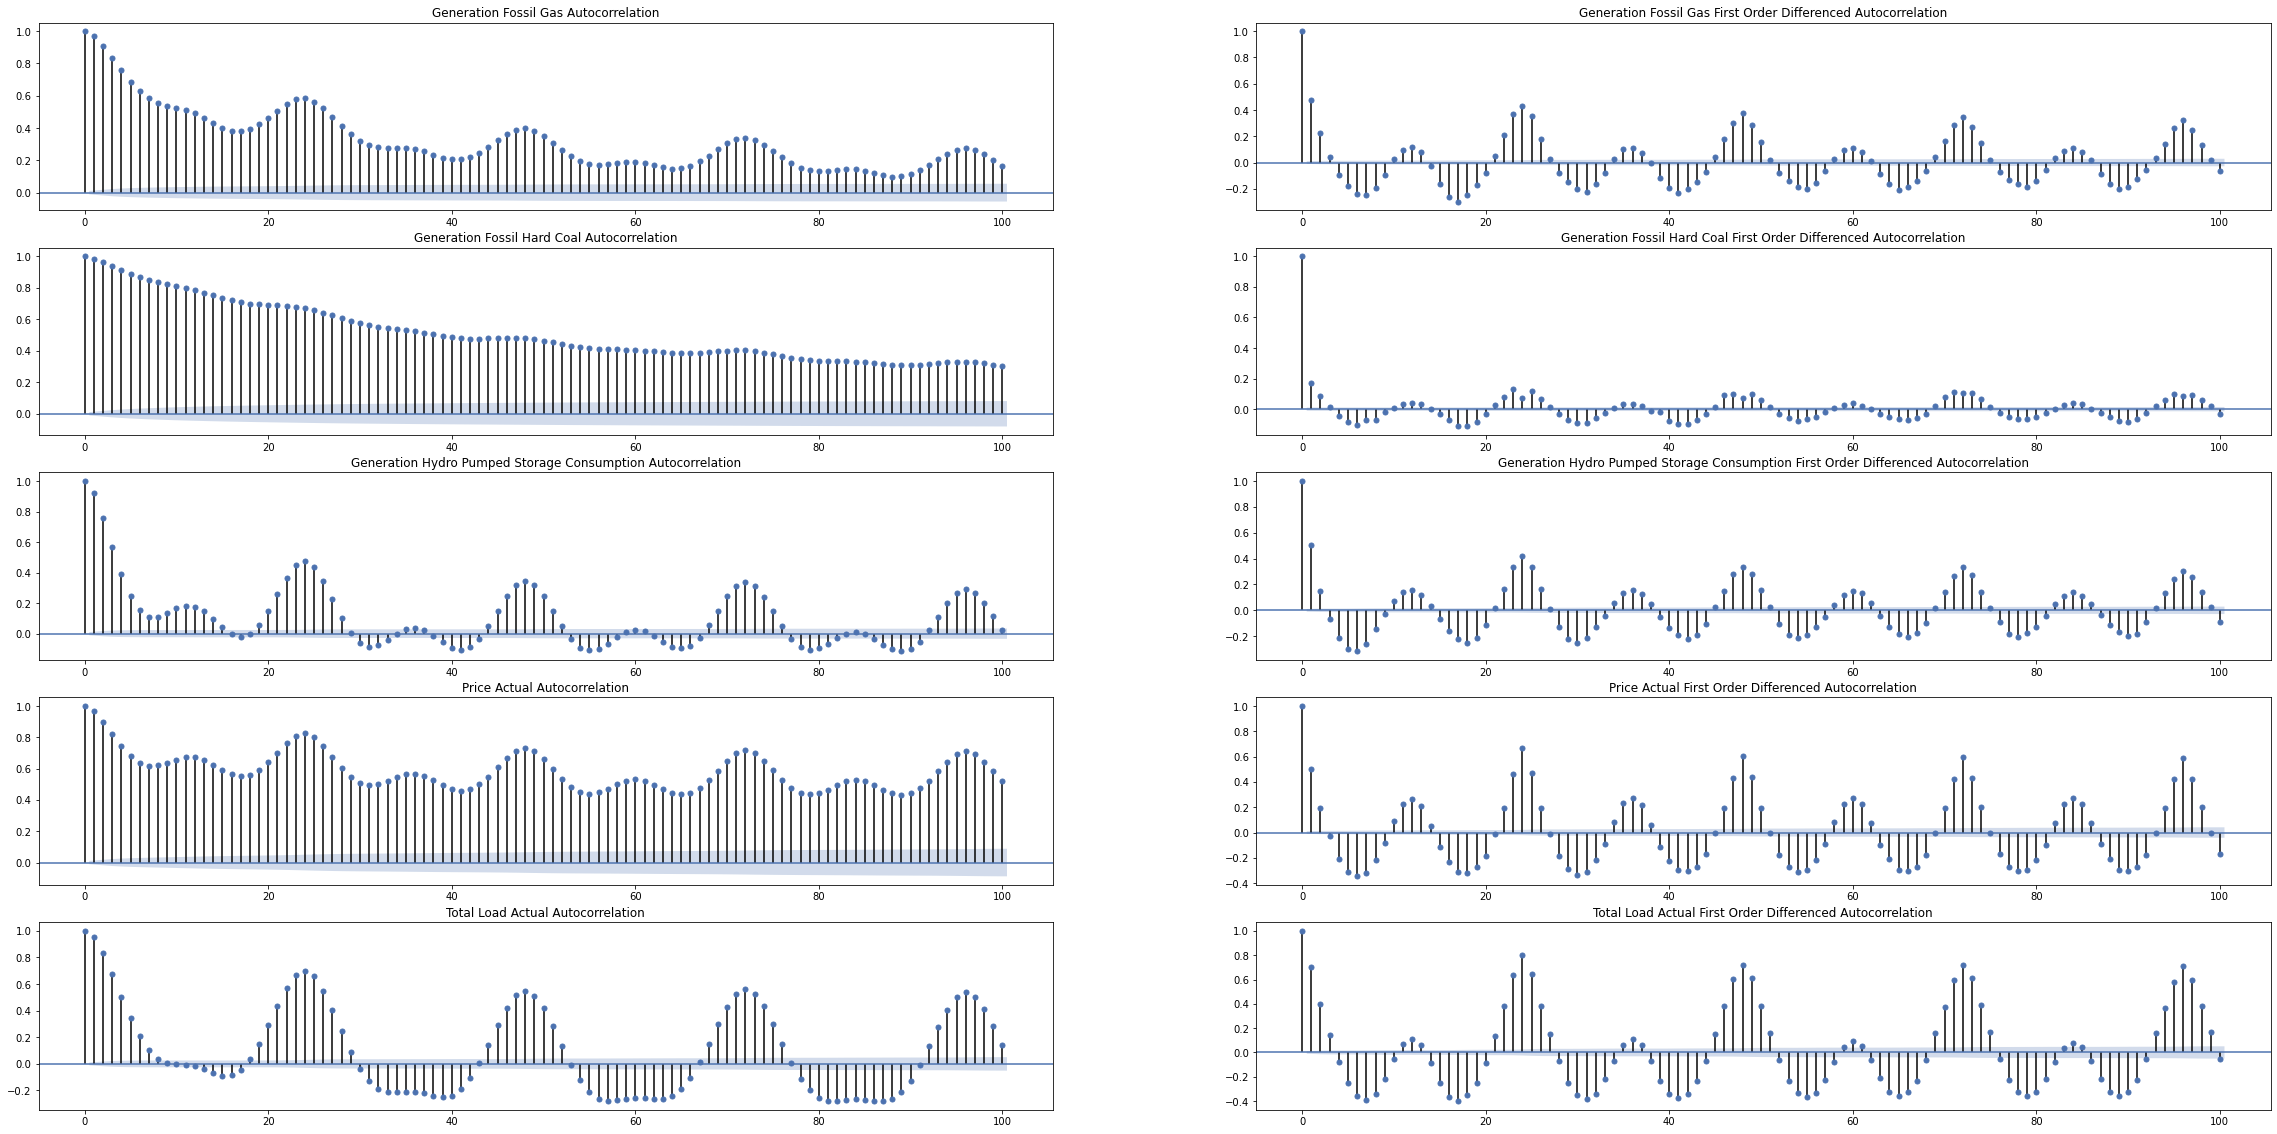

In [9]:
#Read in ACF and PACF PLots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Create figure
f, axes = plt.subplots(5,2, figsize = (40,20))

for col, ax in zip(df.columns, axes.flat):
    plot_acf(df[col], lags = 100, ax = ax, title = str.title(col) + ' Autocorrelation')

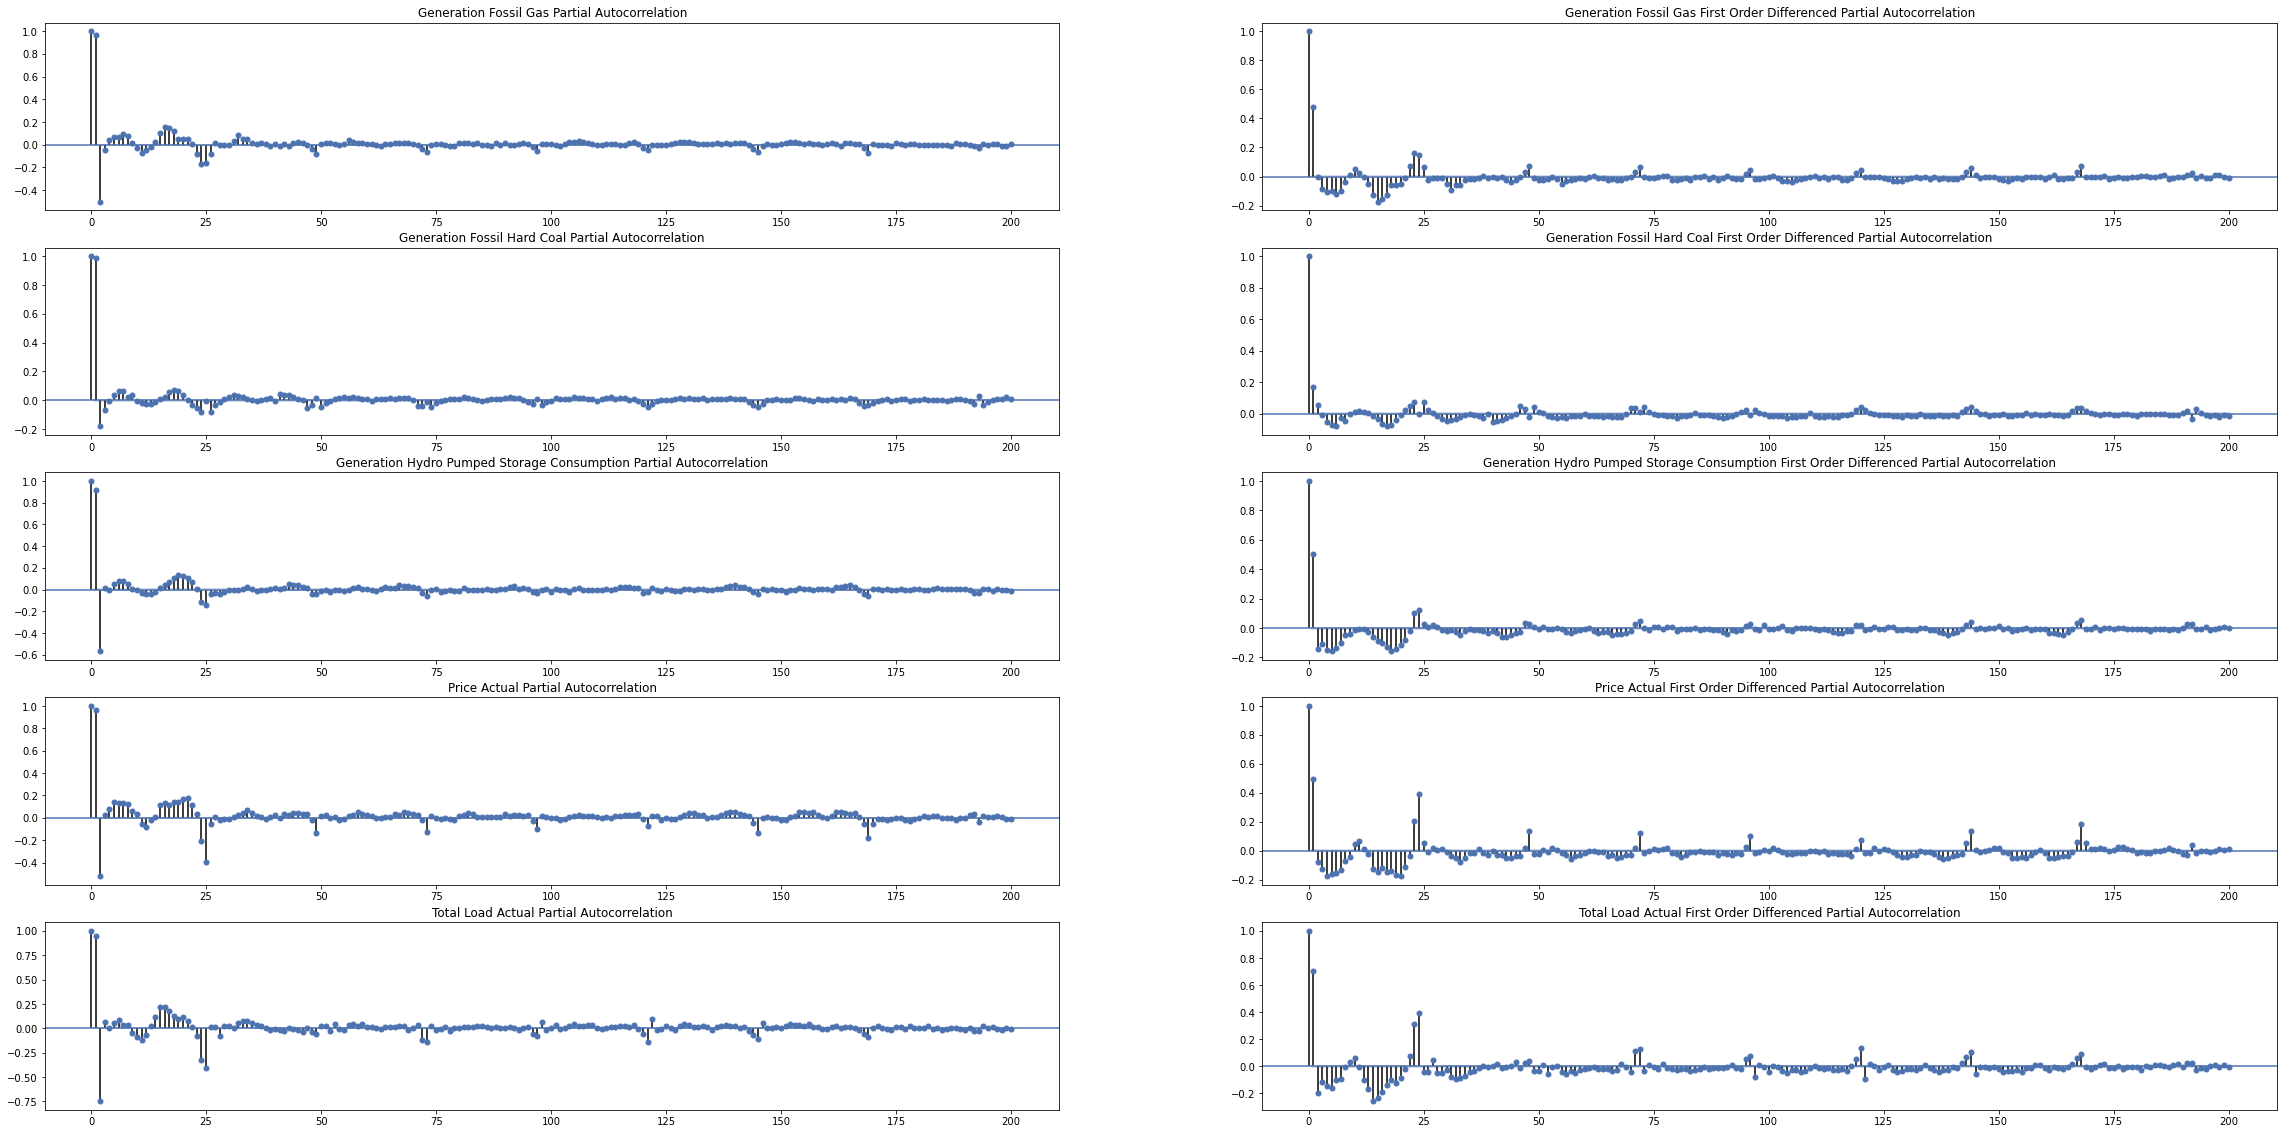

In [15]:
#Create figure
f, axes = plt.subplots(5,2, figsize = (40,20))

for col, ax in zip(df.columns, axes.flat):
    plot_pacf(df[col], lags = 200, ax = ax, title = str.title(col) + ' Partial Autocorrelation')

#### Tests for Stationarity

**ADF_KPSS_test**

In [11]:
from StationarityTests import ADF_KPSS_test

for col in df.columns:
    print('Results for {}\n'.format(str.title(col)))
    ADF_KPSS_test(df[col],0)

Results for Generation Fossil Gas

ADF Statistic: -15.909185342936226
P-Value: 8.160760031980379e-29
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 7.624889297443694
P-Value: 0.01
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Fossil Gas First Order Differenced

ADF Statistic: -33.314215620252355
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0009419847258979032
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Fossil Hard Coal

ADF Statistic: -13.77821064316804
P-Value: 9.402978321757177e-26
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 3.9029627212098497
P-Value: 0.01
Critical Values 10% : 0.347
Critical Values 5% : 0

**mean_var_test**

In [16]:
# from StationarityTests import mean_var_test

# for col in df.columns:
#     print('Results for {}\n'.format(str.title(col)))
#     mean_var_test(df[col],0)   


# Export Data

In [14]:
#Drop dupes
df.drop_duplicates(inplace=True)

#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
df.to_csv(path + '/2020_0622_Processed_Energy.csv')